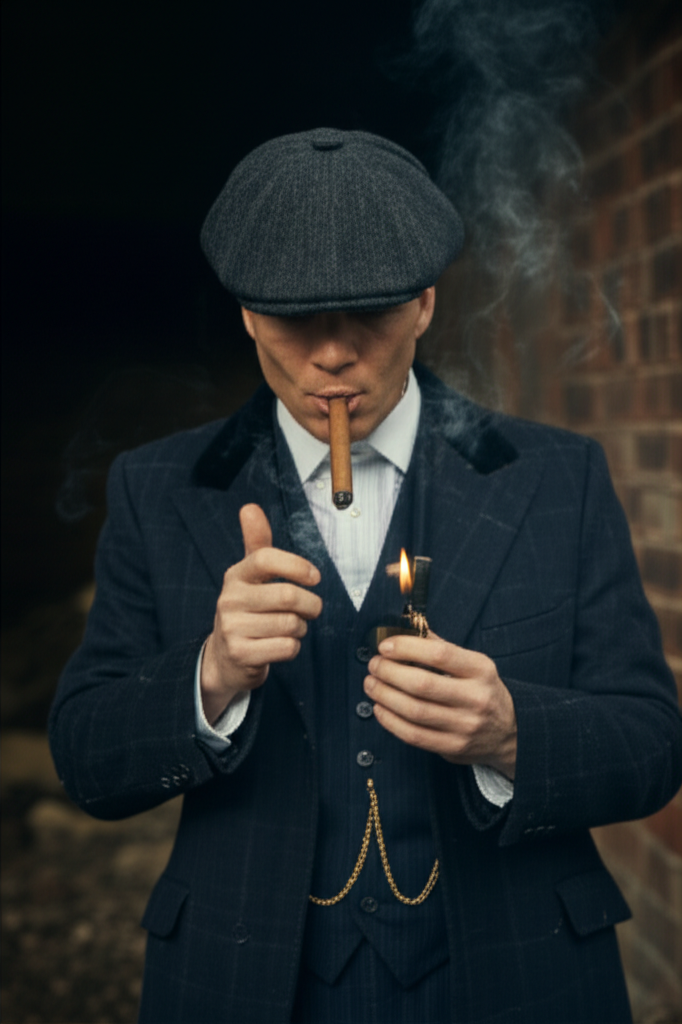

In [7]:
import base64
import getpass
import os

os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google GenAI API Key: ")
#Imports tools to display images in a Jupyter Notebook.
from IPython.display import Image, display
#AIMessage class is used to handle response from the model
from langchain_core.messages import AIMessage #SystemMessage, HumanMessage
#Imports Google GenAI integration for LangChain
from langchain_google_genai import ChatGoogleGenerativeAI

#Initialize the model which supports image generation, it is configured to handle both text and image outputs
llm = ChatGoogleGenerativeAI(model="models/gemini-2.0-flash-preview-image-generation")

#Define a prompt generation function which creates a prompt dictionary
#the user will give Parameters object_description and additional_details for this fxn
def generate_img_prompt(object_description, additional_details=""):
    #Constructs a message with a dynamic prompt using an f-string. The prompt instructs the model to generate a photorealistic image.
    message={
        "role":"user",
        "content": f"Generate a photorealistic image of a{object_description} with {additional_details}"
    }

    # message=[
    #     #SystemMessage("You are a helpful assistant"),
    #     #HumanMessage(f"Generate a photorealistic image of a {object_description} with {additional_details}")
    # ]
    return message

#Take input from the user
user_object=input("Enter the image you want to generate: ")
details=input("Enter the additional details you would like to include in the image: ")
#Fxn calling for image generation and storing the result
output=generate_img_prompt(user_object, details)

#Invoke the model with the dynamic prompt
response=llm.invoke([output], generation_config=dict(response_modalities=["TEXT", "IMAGE"]))

#Function to extract base64 image
def _get_base64_img(result: AIMessage) -> str:
    image_block = next(
        block
        for block in result.content
        if isinstance(block, dict) and block.get("image_url")
    )
    return image_block["image_url"].get("url").split(",")[-1]

#Decode and display the image
image_base64 = _get_base64_img(response)
display(Image(data=base64.b64decode(image_base64)))